<a href="https://colab.research.google.com/github/luiscardon/Labo-II-2023/blob/main/matrices_tridiagonales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matrices estructuradas resultantes del método de diferencias finitas.

En el método de diferencias finitas aparecen matricesde discretización  altamente estructuradas, tridiagonales, pentadiagonales, diagonales por bloque etc. cuya estructura
facilita su resolución eficiente.

En los casos mas sencillos, la matriz es simétrica y definida positiva y diagonal dominante.
Lo primero facilita aún más la resolución.  
Lo segundo asegura que se cumplen las condiciones necesaria para encontrar la solución.

Aqui nos concentrarems en las distintas formas de crear estas matrices  en el caso 1D.

Por supuesto, tambien se pueden crear asignado valores elemento a elemento como ya se ha hecho.


## Sistemas algebraicos  con matrices **tridiagonales**

Varias formas de crear y resolver sistemas de ecuaciones
Ax=b con A una  matriz tridiagonal.

Algunos de estos métodos podrían servir para crear matrices
pentadiagonales que surgen de métodos de diferencias finitas.

Cuando el sistema Ax=b resulta de aplicar el método de diferencias finitas,
por ejemplo a la ecuación de Poisson con condiciones de Dirichlet a ambos
extremos, el vector de incógnitas x representa  los valores nodales de la
variable  dependiente en el interior del dominio de cálculo, excluyendo los
nodos de borde.
Esto debe tenerse en cuenta cuando se trata de representar graficamente
los resultados del problema.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# ==================================================
# usamos estas opciones para que la impresión simple
# de las matrices,  sin formato, queden más prolijas.
# La segunda opción elimina la forma científica de impresión
# cuando se trata de números muy pequeños.
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

# ===================================================


# Una matriz triadiagonal como una matriz de Toeplitz.

Una matriz de Toeplitz es una matriz
en la que  que cada diagonal descendente de izquierda a derecha es constante https://en.wikipedia.org/wiki/Toeplitz_matrix

Los valores de los elementos de cada diagonal son iguales a los valores de los elementos correspondientes de la primera fila para las diagonales superiores y de  primera columna de la matriz para las diagonales inferiores.


scypi.linalg dispone funciones para crear matrices de este tipo y para resolver sistemas algebraicos con esta matriz de coeficientes.

La función scypy.linal.toepliz crea la matriz correspondiente en formato matricial estandar.

Se puede resolsover de varias maneras:
scypy.linal.solve_toeplitz, o con cualquier procedimeineto general.
https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_toeplitz.html#scipy.linalg.solve_toeplitz

El algoritmo que usa scypy.linal.solve_toeplitz es mas raṕido que los métodos generales pero puede ser más inestable,





b [ 1.  0.  0.  0.  0.  0.  0.  0. -1.]
X
[[-2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.]]
[-0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8]


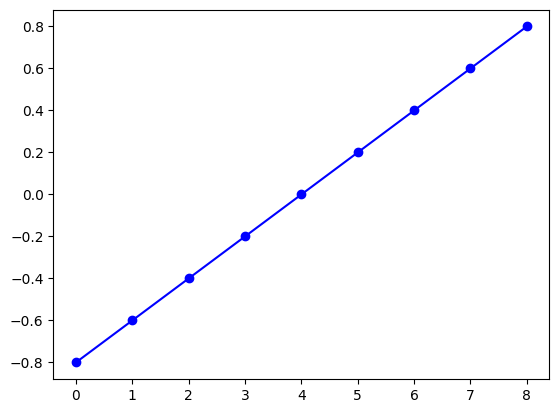

In [9]:
# ===================================================
from scipy.linalg import  solve, toeplitz, solve_toeplitz, inv

n=9
b=np.zeros(n)
b[0]=1
b[n-1]=-1
print("b", b)
#===================================================
# Toeplitz
# Una matriz de Toepliz es una matriz a bandas o diagonales,
# cuyas diagonales son iguales a los valores en la primera fila y columna
C=np.zeros(n)
R=np.zeros(n)

C[0]=-2
C[1]=1
R[0]=-2
R[1]=1

X=toeplitz(C,R)
print("X")
print(X)
XX=solve_toeplitz((C,R),b)
print(XX)
plt.plot(XX,"ob-")
# OK.


Solución con métodos generales

# Métodos generales



Con linalg.solve.

Aparte de los métodos orientados a resolver sistemas con matrices estructuradas como en nuestro caso, linalg.solve es el método más rápido.

Pero cuidado, en general, los métodos directos no son aconsejables si la matriz es muy grande.

In [7]:
XX=solve(X,b)
print(XX)


[-0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8]


Mediante inversión de matriz.

Python permite escribir la solución por inversion de matriz de varias maneras.

Sea
\begin{equation}
Ax=b
\end{equation}

\begin{equation}𝑥=𝐴^{-1}𝐴𝑥=𝐴^{−1}𝑏\end{equation}
 \begin{equation}
x=A^{-1}b
\end{equation}

Como en python los arreglos unidimensionales son filas, debe transponerse $b$ para efectuar el producto interno matriz vector con el método dot

In [18]:
X_inv = np.linalg.inv(X)
x=X_inv.dot(b.T)
print(x)

[-0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8]


Observe que también se puede escribir.
Aqui se usa la función dot

In [11]:
X_inv = np.linalg.inv(X)

x = np.dot(X_inv, b)
print(x)


[-0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8]


Chequeo
\begin{equation}
x=A^{-1}b ;   \quad \quad \quad  Ax-b = A (A^{-1}b) - b=
(A A^{-1})b - b= Ib - b = b-b=0\end{equation}

In [15]:
x=X_inv.dot(b.T)
print(x)

# Chequeo
a=X.dot(inv(X).dot(b)) -b
print (a)

[-0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8]
[ 0. -0.  0.  0. -0.  0.  0.  0.  0.]


# Creación de matrices diagonales con numpy

 [np.diag](https://numpy.org/doc/stable/reference/generated/numpy.diag.html) extrae o construye un arreglo diagonal.

 numpy.diag(v, k=0)
 k es el ofset de la diagonal

 Las diagonales deben tener el número correcto de elementos. La función se da cuenta del número correcto de elementos de la matriz.


In [ ]:

AA=np.full((n,),-2)
print("AA", AA, AA.shape)
AAA=np.diag(AA)
print(AAA, AAA.shape)

BB=np.full((n-1,),1)
print("BB", BB, BB.shape)
BBB=np.diag(BB,1)
print(BBB,BBB.shape)


CC=np.full((n-1,),1)
CCC=np.diag(CC,-1)
print(CCC,CCC.shape)

D = np.diag(AA) + np.diag(BB, 1) + np.diag(CC, -1)

print("D")
print(D)
XXX=solve(D,b)
print(XXX)
#OK

# Librería sparse

La librería [sparse](https://docs.scipy.org/doc/scipy/reference/sparse.html) dispone de varias funciones y métodos para trabajar con matrices ralas o dispersas.

Dentro de las matrices ralas (pocos coeficientes no cero) o dispersas (coeficientes dispersos), nombres que se usan para el mismos conecpto,  se pueden considerar algunas matrices estructuradas como las que nos ocupan aqui.

En las matrices ralas en general, la posición de los coeficientes no ceros no está dada por la estructura.



Construcción de matrices diagonales y extracción de diagonales con
la función [diags](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.diags.html#scipy.sparse.diags)



# Creación o extracción de diagonales con diags

scipy.sparse.diags

El primer arreglo de diags se refiere a los valores de los coeficientes,
el sugundo arreglo indica el offset (corrimiento, desfasaje...) con respecto a la diagonal principal:
0= diagonal principal, $<0$ diagonales inferiores, $>0$ diagonales superiores.
Se comienza con el offset de la diagonal inferior con mayor ofset.


In [ ]:

Z= diags([1, -2,1],[-1 ,0,1],shape=(9,9)).toarray()
print("Z")
print(Z)


# Matrices a  bandas.

Una matriz banda es una matriz dispersa cuyas entradas distintas de cero están confinadas a una banda diagonal, que comprende la diagonal principal y cero o más diagonales a cada lado.

Las matrices tridiagonales, pentadiagonales, toeplitz incompletas, etc. son matrices a bandas.
scipy.sparse.linalg dispone de la función
 [solve_banded](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_banded.html) para resolver sistemas de ecuaciónes con matriz de coeficientes  a bandas.

 Rquiere que las diagonales se provean en las filas de
 una matriz que debe tener tantas como diagonales.
 Se empieza por la diagonal superior más alejada de la diagonal principal.
 Las diagonales superiores deben ir precedidas de ceros, tantos como el offset o corrimiento con
 respecto a la diagonal principal.
 Las diagonales inferiores, deben terminar con tantos ceros como el offset.
 El primer argumento es una shape (*,*) que indica cuantas diagonales
 superiores e inferiores tiene la matriz.


In [ ]:
# Se crea la matriz tridiagonal con formato de banda reueqrido por solve_banded
bb=np.full((n),1)
bb[0]=0
print("bb",bb)
aa=np.full((n),-2)
cc=np.full((n),1)
cc[n-1]=0
ab=np.concatenate((bb,aa,cc)).reshape((3,9))
print("ab")
print(ab)

x= solve_banded((1,1),ab, b)
print (x)
#OK